In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# **Importing data & understanding data description**



In [ ]:
#uploading the dataset from drive 
df = pd.read_csv("/content/drive/MyDrive/rideshare_kaggle.csv") 
df.head()

In [ ]:
#displaying the data
print("Shape of Data : ", df.shape)
print("\nColumns : ",df.columns)
print("\nTotal no of attributes/columns : ", len(df.columns))

Shape of Data :  (693071, 57)

Columns :  Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTem

In [ ]:
# count records of each cab type
cab_type_counts = df['cab_type'].value_counts()

print(cab_type_counts)


Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


# **Data cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
#nan value of price per cab type
nan_counts = df.groupby('cab_type')['price'].apply(lambda x: x.isna().sum())

print(nan_counts)


cab_type
Lyft        0
Uber    55095
Name: price, dtype: int64


In [ ]:
# filling NaN values of price with the mean of the record having same source and destination
df['price'] = df.groupby(['source', 'destination','cab_type'])['price'].transform(lambda x: x.fillna(x.mean()))



In [ ]:
df['is_rain'] = df['short_summary'].str.contains('rain', case=False).astype(int)

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,0,2018-12-16,09:30:07
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,1,2018-11-27,02:00:23
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0,2018-11-28,01:00:22
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0,2018-11-30,04:53:02
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,0,2018-11-29,03:49:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05


In [ ]:
# Create "odd_time" column
df['odd_time'] = df['time'].apply(lambda x: 1 if x.hour < 6 else 0)

# Create "peak_time" column
df['peak_time'] = df['time'].apply(lambda x: 1 if (x.hour >= 8 and x.hour <= 10) or (x.hour >= 16 and x.hour <= 19) else 0)

# Print the updated dataframe
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time,peak_time
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544968800,33.73,1545012000,38.07,1544958000,0,2018-12-16,09:30:07,0,1
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,36.20,1543291200,43.92,1543251600,1,2018-11-27,02:00:23,1,0
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543320000,31.04,1543377600,44.12,1543320000,0,2018-11-28,01:00:22,1,0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543510800,30.30,1543550400,38.53,1543510800,0,2018-11-30,04:53:02,1,0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,29.11,1543392000,35.75,1543420800,0,2018-11-29,03:49:20,1,0


In [ ]:
#sorting by datetime column
df = df.sort_values(by='datetime')

In [ ]:
df['day_of_week'] = df['datetime'].dt.day_name()

In [ ]:
# Create "is_weekend" column
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x=="Saturday" or x=="Sunday" else 0)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time,peak_time,day_of_week,is_weekend
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34918,e299c3bf-a429-4b19-af4a-ebd8e9ad74f7,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Financial District,Haymarket Square,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
215397,20caa061-2ded-49f8-882b-1e7eae6285ff,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Fenway,Theatre District,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
166550,7f1cbf41-2136-4e37-889d-dd0dfff02d38,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Haymarket Square,Back Bay,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
290785,8c28dc35-c4a8-41e8-abe8-d5d65849448d,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Northeastern University,Beacon Hill,Lyft,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0


In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

# **Visualization**

In [ ]:
# identifies the top 5 most popular routes (combination of source and destination) in the df.
popular_routes = df.groupby(['source', 'destination']).size().reset_index(name='count')
popular_routes['source'], popular_routes['destination'] = np.where(popular_routes['source'] < popular_routes['destination'], 
                                                                  [popular_routes['source'], popular_routes['destination']], 
                                                                  [popular_routes['destination'], popular_routes['source']])
popular_routes = popular_routes.drop_duplicates(['source', 'destination']).nlargest(5, 'count').reset_index(drop=True)
popular_routes


In [ ]:
#prints the top 5 sources and top 5 destinations separately
top_sources = df['source'].value_counts().head(5)
print("Top 5 sources:")
print(top_sources)

top_destinations = df['destination'].value_counts().head(5)
print("\nTop 5 destinations:")
print(top_destinations)


Top 5 sources:
Financial District    58857
Theatre District      57813
Back Bay              57792
Boston University     57764
North End             57763
Name: source, dtype: int64

Top 5 destinations:
Financial District    58851
Theatre District      57798
Back Bay              57780
Haymarket Square      57764
Boston University     57764
Name: destination, dtype: int64


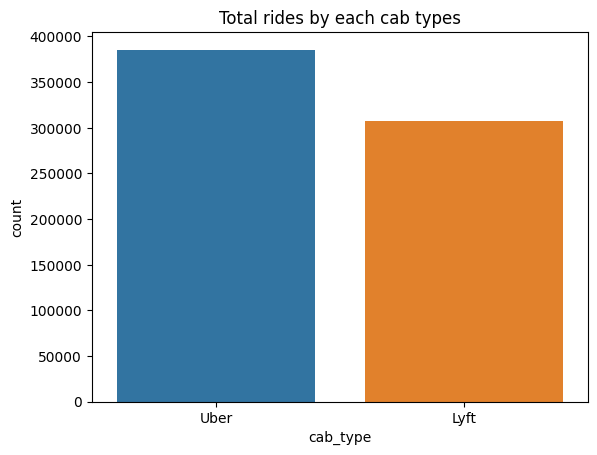

In [ ]:
# Bar chart of the count of rides by cab type:

sns.countplot(x='cab_type', data=df)
plt.title('Total rides by each cab types')
plt.show()


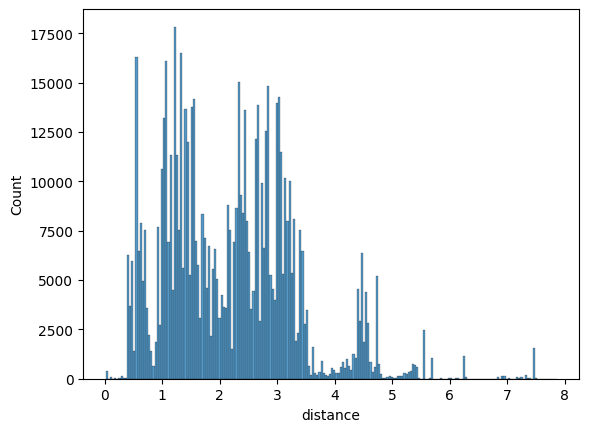

In [ ]:
# Histogram of the distribution of distance:

sns.histplot(data=df, x='distance')
plt.show()


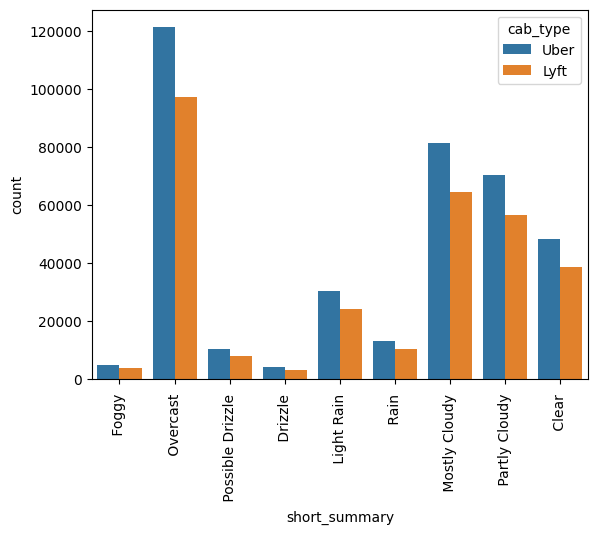

In [ ]:
# Bar chart of the count of rides by weather category:

sns.countplot(x='short_summary',hue='cab_type', data=df)
plt.xticks(rotation=90)
plt.show()


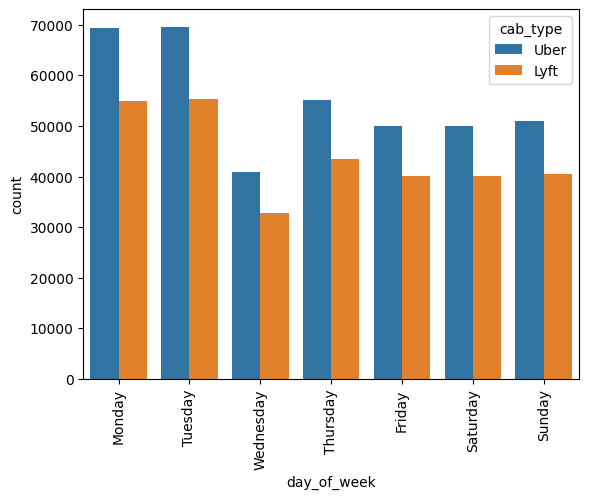

In [ ]:
# Bar chart of the count of rides by day:

sns.countplot(x='day_of_week',hue='cab_type', data=df)
plt.xticks(rotation=90)
plt.show()

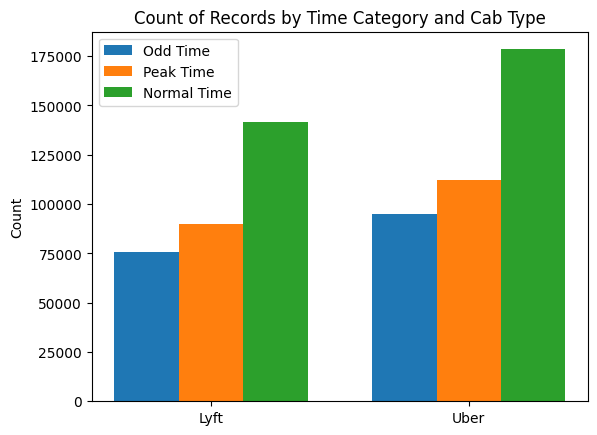

In [ ]:

# create a new column for normal_time
df['normal_time'] = np.where((df['odd_time'] == 0) & (df['peak_time'] == 0), 1, 0)

# group the data by cab_type and calculate the counts
grouped = df.groupby('cab_type')[['odd_time', 'peak_time', 'normal_time']].sum()

# create a bar chart for each cab type
fig, ax = plt.subplots()
x = np.arange(len(grouped.index))
width = 0.25

rects1 = ax.bar(x - width, grouped['odd_time'], width, label='Odd Time')
rects2 = ax.bar(x, grouped['peak_time'], width, label='Peak Time')
rects3 = ax.bar(x + width, grouped['normal_time'], width, label='Normal Time')

# add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of Records by Time Category and Cab Type')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.legend()

plt.show()


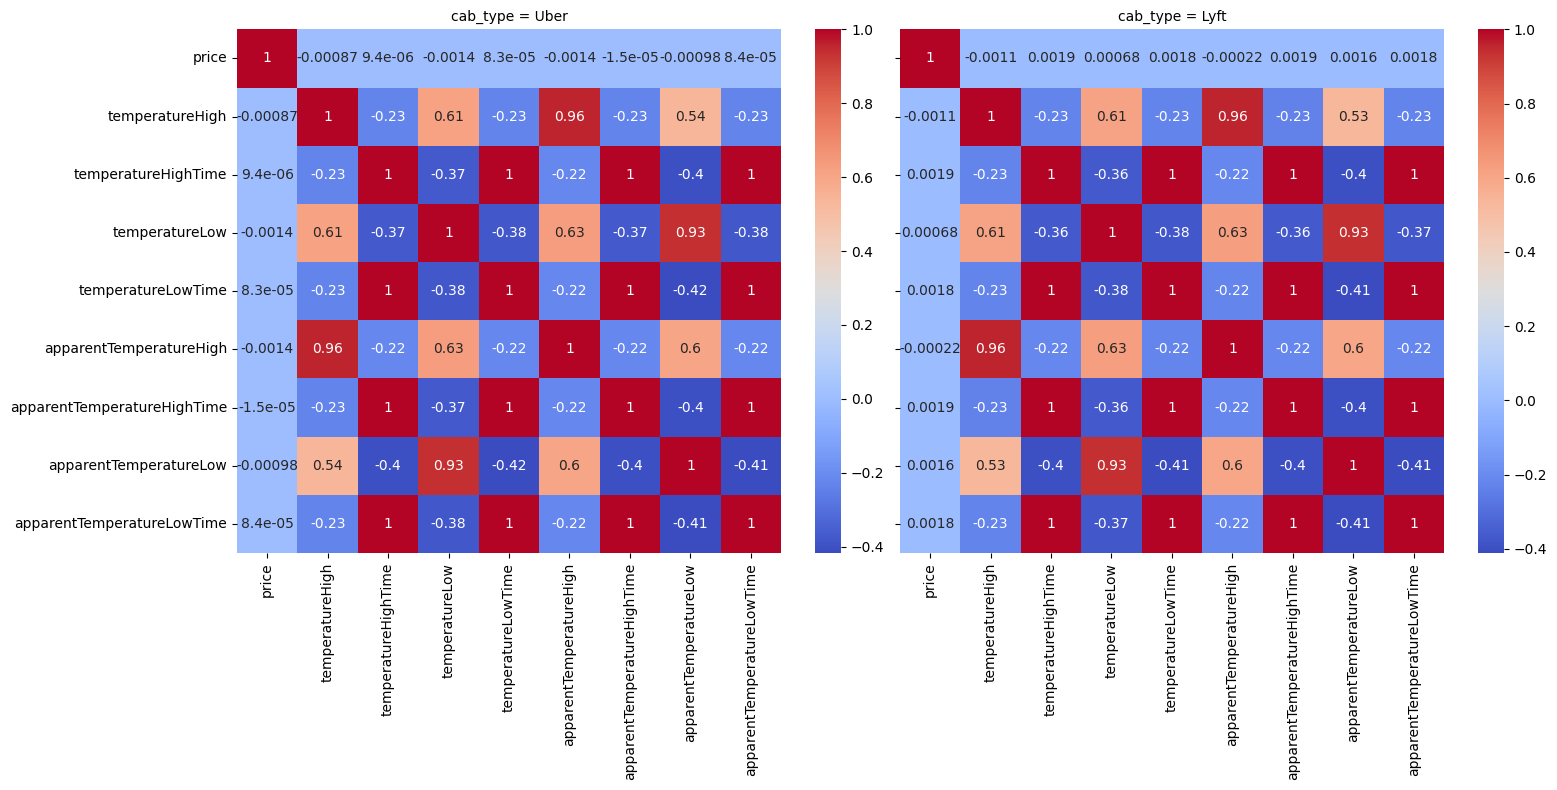

In [ ]:
#heatmap displays the correlations between the variables as color-coded cells, with red indicating positive correlation and blue indicating negative correlation
g = sns.FacetGrid(df, col='cab_type', height=8, aspect=1.0)
g = g.map_dataframe(lambda data, **kwargs: sns.heatmap(data[['price', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime']].corr(), annot=True, cmap='coolwarm'))

plt.show()

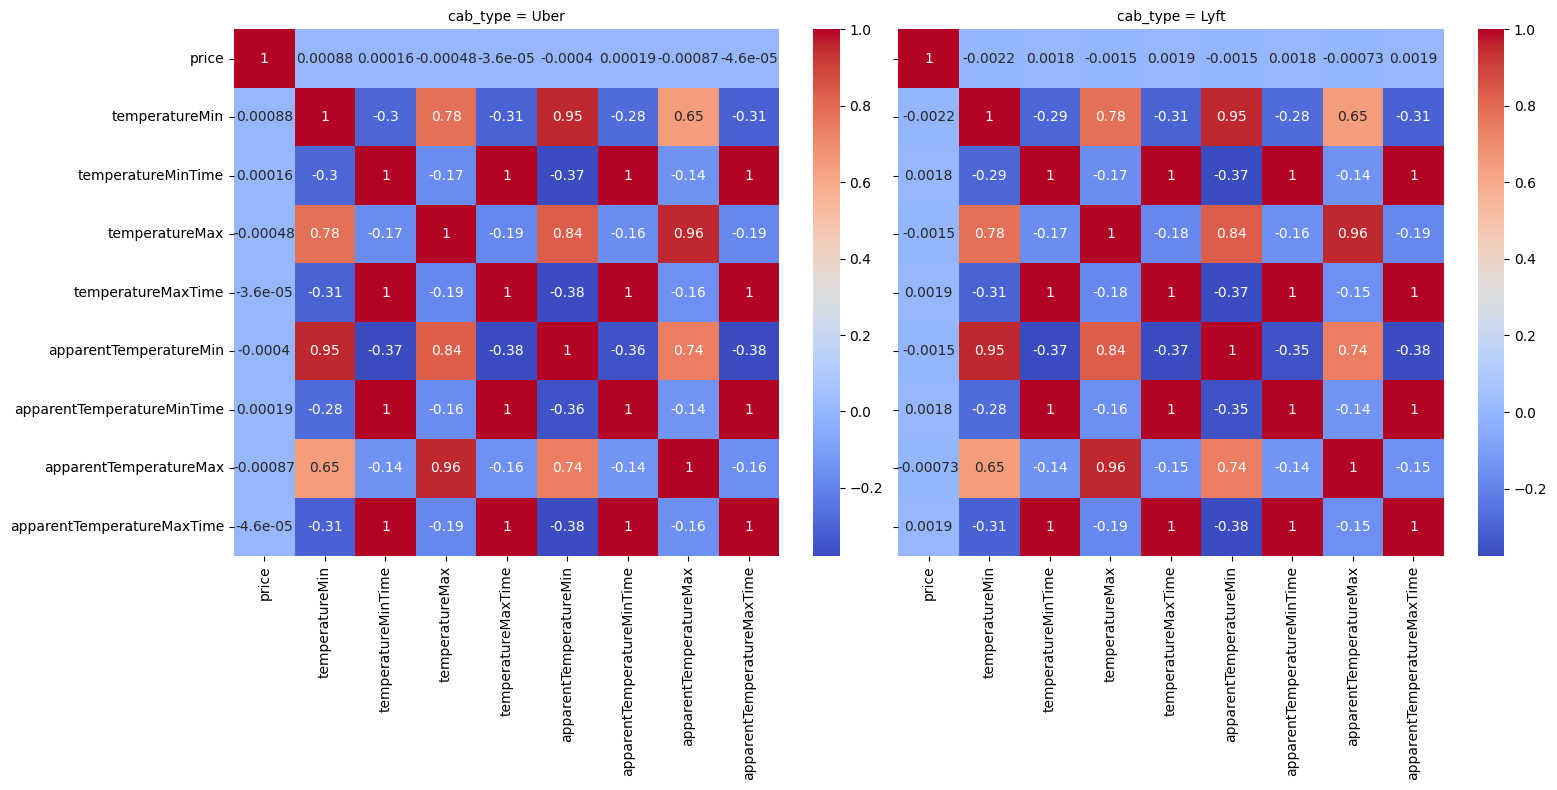

In [ ]:
g = sns.FacetGrid(df, col='cab_type', height=8, aspect=1.0)
g = g.map_dataframe(lambda data, **kwargs: sns.heatmap(data[['price', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime']].corr(), annot=True, cmap='coolwarm'))

plt.show()

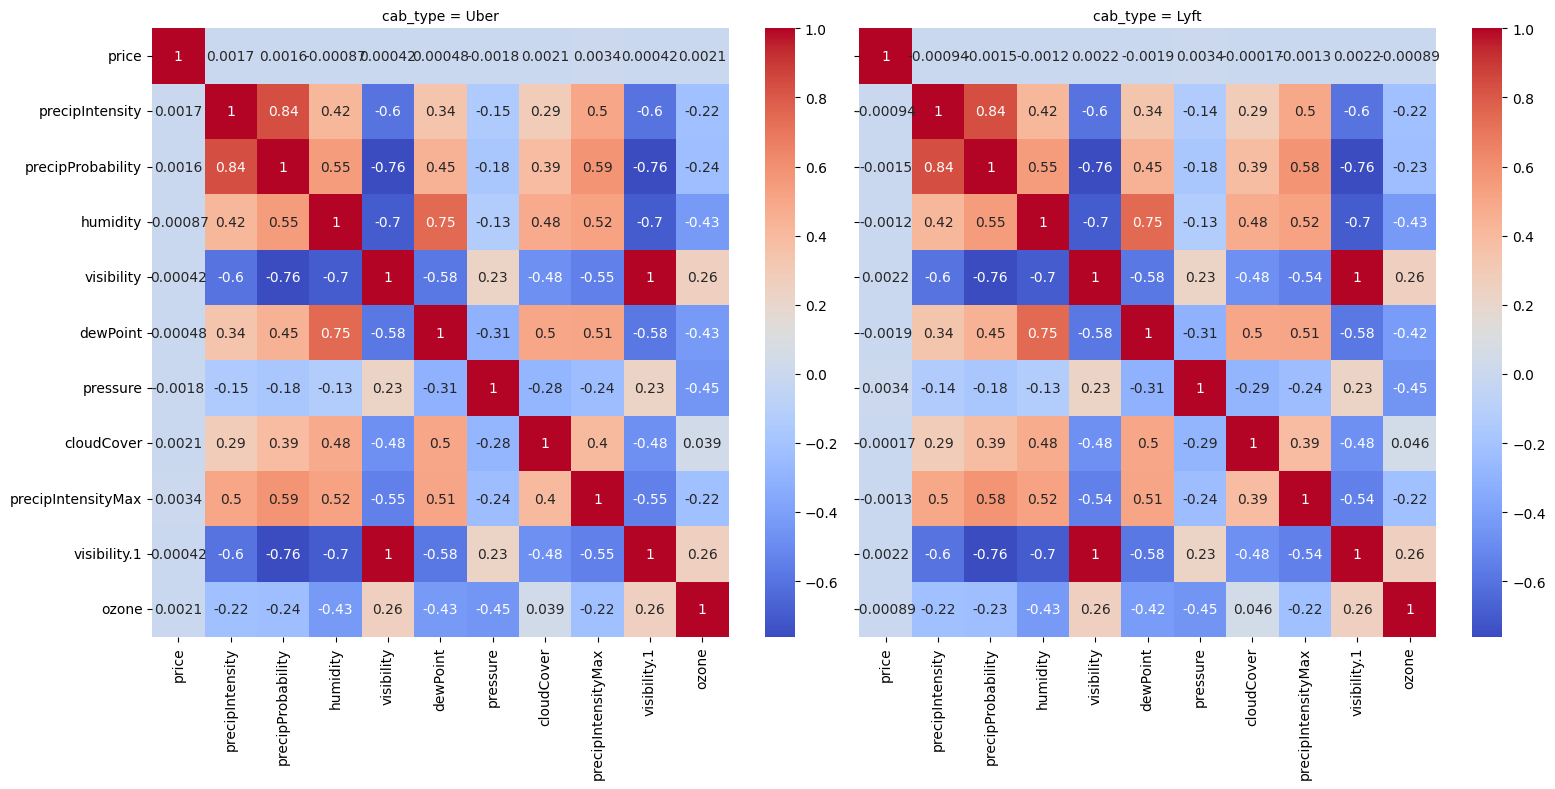

In [ ]:
g = sns.FacetGrid(df, col='cab_type', height=8, aspect=1.0)
g = g.map_dataframe(lambda data, **kwargs: sns.heatmap(data[['price', 'precipIntensity', 'precipProbability', 'humidity',
                        'visibility', 'dewPoint', 'pressure', 'cloudCover', 'precipIntensityMax',
       'visibility.1', 'ozone']].corr(), annot=True, cmap='coolwarm'))

plt.show()

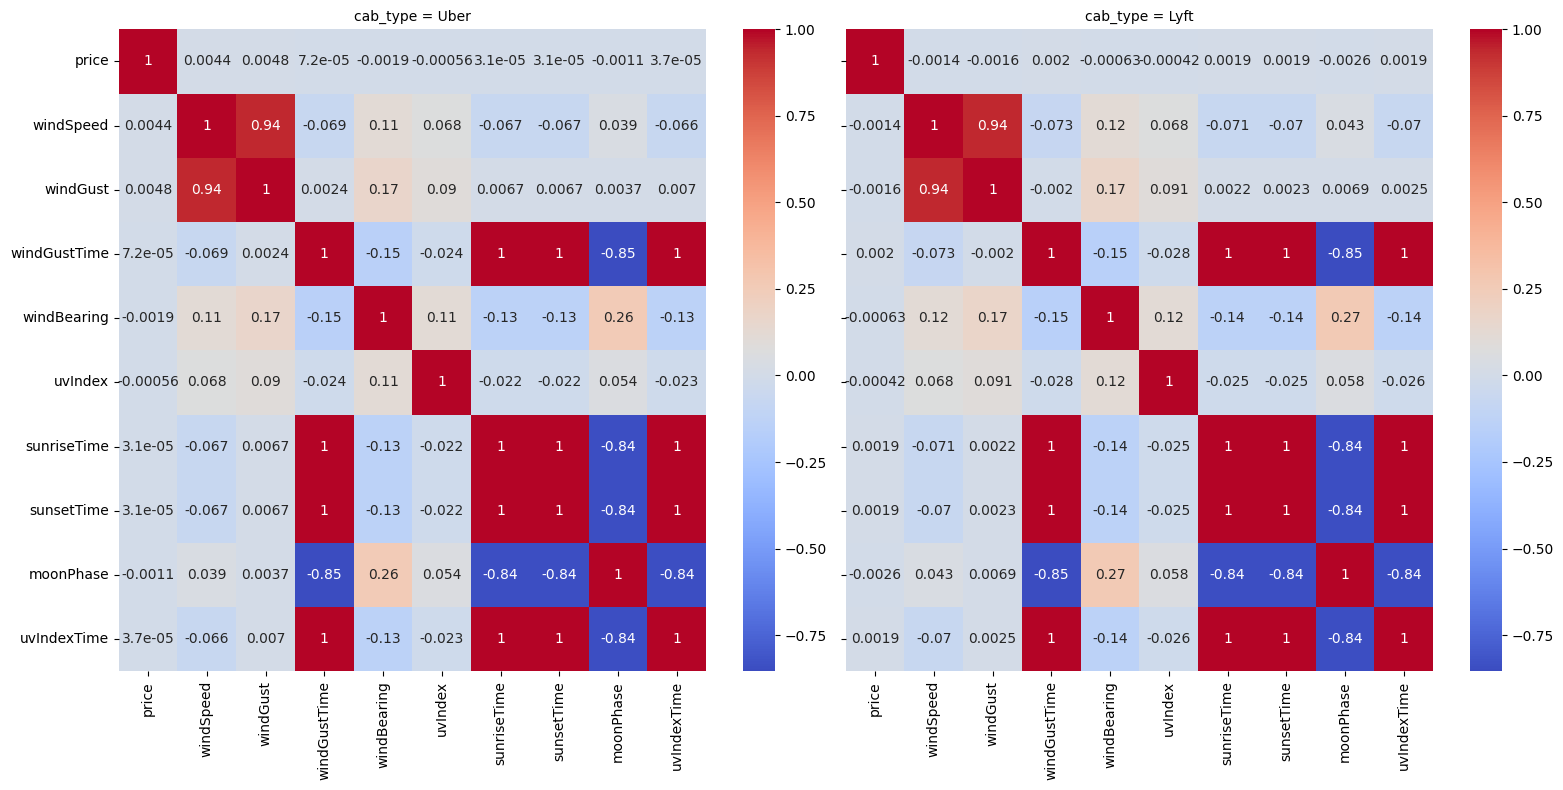

In [ ]:
g = sns.FacetGrid(df, col='cab_type', height=8, aspect=1.0)
g = g.map_dataframe(lambda data, **kwargs: sns.heatmap(data[['price', 'windSpeed','windGust', 'windGustTime', 'icon',
                                                             'windBearing', 'uvIndex','sunriseTime', 'sunsetTime', 'moonPhase',
                                                             'uvIndexTime']].corr(), annot=True, cmap='coolwarm'))

plt.show()

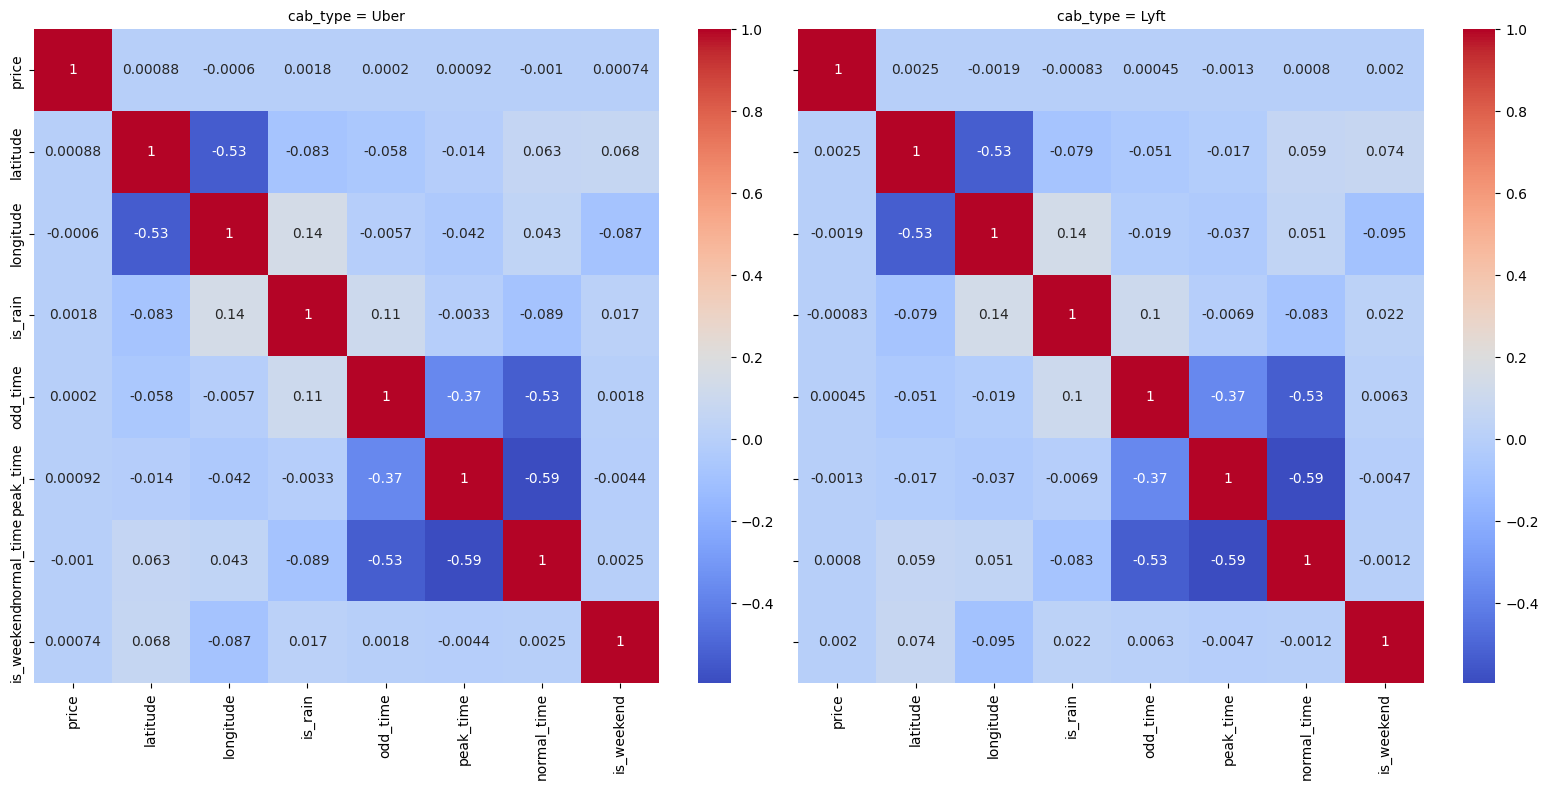

In [ ]:
g = sns.FacetGrid(df, col='cab_type', height=8, aspect=1.0)
g = g.map_dataframe(lambda data, **kwargs: sns.heatmap(data[['price', 'latitude', 'longitude', 
                                                              'long_summary', 'is_rain', 'odd_time', 'peak_time', 'normal_time', 
                                                             'is_weekend']].corr(), annot=True, cmap='coolwarm'))

plt.show()

In [ ]:
newdf = df.drop(['temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'precipIntensity', 'precipProbability', 'humidity',
       'visibility', 'dewPoint', 'pressure', 'cloudCover', 'precipIntensityMax',
       'visibility.1', 'ozone', 'windSpeed','windGust', 'windGustTime', 'icon',
       'windBearing', 'uvIndex','sunriseTime', 'sunsetTime', 'moonPhase',
       'uvIndexTime', 'latitude', 'longitude', 'long_summary', 'is_rain', 'odd_time', 'peak_time', 'normal_time', 'is_weekend'],axis=1)
newdf.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,date,time,day_of_week
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,UberX,7.000000,0.56,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,Taxi,14.074304,1.57,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,Lyft,7.000000,1.23,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,Lux,19.500000,2.66,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,Shared,5.000000,1.23,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday


In [ ]:
newdf= newdf.drop('timezone', axis=1)

In [ ]:
newdf= newdf.drop('product_id', axis=1)
newdf.head()

,id,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,date,time,day_of_week
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,North Station,Haymarket Square,Uber,UberX,7.000000,0.56,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,Theatre District,North End,Uber,Taxi,14.074304,1.57,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,North End,West End,Lyft,Lyft,7.000000,1.23,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,Boston University,Beacon Hill,Lyft,Lux,19.500000,2.66,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,North End,West End,Lyft,Shared,5.000000,1.23,1.0,41.83,41.83,Foggy,2018-11-26,03:40:46,Monday


In [ ]:
newdf.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'apparentTemperature',
       'short_summary', 'date', 'time', 'day_of_week'],
      dtype='object')

We can further eliminate features that have no correlation with the price as per the correlation heat map

In [ ]:
features_to_eliminate= ['id', 'timestamp', 'hour', 'day', 'month', 'datetime',
       'surge_multiplier', 'temperature', 'apparentTemperature',
       'short_summary', 'date', 'time', 'day_of_week','distance']
newdf= newdf.drop(features_to_eliminate, axis=1)
newdf.head()

,source,destination,cab_type,name,price
66422,North Station,Haymarket Square,Uber,UberX,7.000000
446073,Theatre District,North End,Uber,Taxi,14.074304
184332,North End,West End,Lyft,Lyft,7.000000
167114,Boston University,Beacon Hill,Lyft,Lux,19.500000
184333,North End,West End,Lyft,Shared,5.000000


In [ ]:
newdf.columns

Index(['source', 'destination', 'cab_type', 'name', 'price'], dtype='object')

Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Create a list of columns to encode
cols_to_encode = [col for col in newdf.columns if col not in ['price']]

# Apply label encoding to each column
for col in cols_to_encode:
    newdf[col] = label_encoder.fit_transform(newdf[col])

    # Get the mapping from encoded values to original names
    mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

    # Print the mapping for the column
    print(f"Mapping for {col} column:")
    print(mapping,"\n")


Mapping for source column:
{0: 'Back Bay', 1: 'Beacon Hill', 2: 'Boston University', 3: 'Fenway', 4: 'Financial District', 5: 'Haymarket Square', 6: 'North End', 7: 'North Station', 8: 'Northeastern University', 9: 'South Station', 10: 'Theatre District', 11: 'West End'} 

Mapping for destination column:
{0: 'Back Bay', 1: 'Beacon Hill', 2: 'Boston University', 3: 'Fenway', 4: 'Financial District', 5: 'Haymarket Square', 6: 'North End', 7: 'North Station', 8: 'Northeastern University', 9: 'South Station', 10: 'Theatre District', 11: 'West End'} 

Mapping for cab_type column:
{0: 'Lyft', 1: 'Uber'} 

Mapping for name column:
{0: 'Black', 1: 'Black SUV', 2: 'Lux', 3: 'Lux Black', 4: 'Lux Black XL', 5: 'Lyft', 6: 'Lyft XL', 7: 'Shared', 8: 'Taxi', 9: 'UberPool', 10: 'UberX', 11: 'UberXL', 12: 'WAV'} 



In [ ]:
newdf.head()

,source,destination,cab_type,name,price
66422,7,5,1,10,7.000000
446073,10,6,1,8,14.074304
184332,6,11,0,5,7.000000
167114,2,1,0,2,19.500000
184333,6,11,0,7,5.000000


# **Model Implimentation**

In [ ]:
#Separate the features and the target
X= newdf.drop('price', axis=1)
y= newdf['price']

In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

In [ ]:
X_train.shape

(519803, 4)

In [ ]:
X_test.shape

(173268, 4)

In [ ]:
y_train.shape

(519803,)

In [ ]:
y_test.shape

(173268,)

linear regression

In [ ]:
#implementing linear regression
import math
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
lrregressor = LinearRegression()
lrregressor.fit(X_train, y_train)

y_pred = lrregressor.predict(X_test)

lr_mse = sm.mean_squared_error(y_test, y_pred)
lr_rmse = math.sqrt(lr_mse)
lr_r2 = sm.r2_score(y_test, y_pred)
lr_euclidean = euclidean(y_test, y_pred)
lr_mean_error = lr_euclidean / len(y_test)
lr_mae = mean_absolute_error(y_test, y_pred)

print("Mean squared error =", lr_mse)
print("Root Mean squared error =", lr_rmse)
print("Mean Error =", lr_mean_error)
print("Mean Absolute Error =", lr_mae)
print("R2 Score =", lr_r2)

decision tree regression

In [ ]:
#implementing decision tree regression
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(random_state = 0)
dtregressor.fit(X_train, y_train)

y_pred = dtregressor.predict(X_test)

dt_mse = sm.mean_squared_error(y_test, y_pred)
dt_rmse = math.sqrt(dt_mse)
dt_r2 = sm.r2_score(y_test, y_pred)
dt_euclidean = euclidean(y_test, y_pred)
dt_mean_error = dt_euclidean / len(y_test)
dt_mae = mean_absolute_error(y_test, y_pred)

print("Mean squared error =", dt_mse)
print("Root Mean squared error =", dt_rmse)
print("Mean Error =", dt_mean_error)
print("Mean Absolute Error =", dt_mae)
print("R2 Score =", dt_r2)

Mean squared error = 6.51762915772022
Root Mean squared error = 2.552964778002278
Mean Error = 0.006133179026757722
Mean Absolute Error = 1.343460143224842
R2 Score = 0.9191658109409165


random forest regression

In [ ]:
#implementing random forest regression
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train, y_train)

y_pred = rfregressor.predict(X_train)

rf_mse = sm.mean_squared_error(y_train, y_pred)
rf_rmse = math.sqrt(rf_mse)
rf_r2 = sm.r2_score(y_train, y_pred)
rf_euclidean = euclidean(y_train, y_pred)
rf_mean_error = rf_euclidean / len(y_test)
rf_mae = mean_absolute_error(y_train, y_pred)

print("Mean squared error =", rf_mse)
print("Root Mean squared error =", rf_rmse)
print("Mean Error =", rf_mean_error)
print("Mean Absolute Error =", rf_mae)
print("R2 Score =", rf_r2)

Mean squared error = 6.486794765208763
Root Mean squared error = 2.5469186805253052
Mean Error = 0.01059780946450771
Mean Absolute Error = 1.3445492200227522
R2 Score = 0.9196530557222493


lasso regression

In [ ]:
#implementing lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

lasso_mse = sm.mean_squared_error(y_test, y_pred)
lasso_rmse = math.sqrt(lasso_mse)
lasso_r2 = sm.r2_score(y_test, y_pred)
lasso_euclidean = euclidean(y_test, y_pred)
lasso_mean_error = lasso_euclidean / len(y_test)
lasso_mae = mean_absolute_error(y_test, y_pred)

print("Mean squared error =", lasso_mse)
print("Root Mean squared error =", lasso_rmse)
print("Mean Error =", lasso_mean_error)
print("Mean Absolute Error =", lasso_mae)
print("R2 Score =", lasso_r2)

Mean squared error = 54.22861535441721
Root Mean squared error = 7.3640081039076275
Mean Error = 0.017691109742258987
Mean Absolute Error = 5.642293211929889
R2 Score = 0.3274354769358223


ElasticNet Regression

In [ ]:
#implementing ElasticNet Regression
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(X_train, y_train)

enet_mse = sm.mean_squared_error(y_test, y_pred)
enet_rmse = math.sqrt(lasso_mse)
enet_r2 = sm.r2_score(y_test, y_pred)
enet_euclidean = euclidean(y_test, y_pred)
enet_mean_error = enet_euclidean / len(y_test)
enet_mae = mean_absolute_error(y_test, y_pred)

print("Mean squared error =", enet_mse)
print("Root Mean squared error =", enet_rmse)
print("Mean Error =", enet_mean_error)
print("Mean Absolute Error =", enet_mae)
print("R2 Score =", enet_r2)

Mean squared error = 54.22861535441721
Root Mean squared error = 7.3640081039076275
Mean Error = 0.017691109742258987
Mean Absolute Error = 5.642293211929889
R2 Score = 0.3274354769358223


model performance visualization

In [ ]:
from tabulate import tabulate

table = [["Model", "MSE", "RMSE", "R2 Score", "Mean Error", "Mean Absolute Error"],
         ["Linear Regression", lr_mse, lr_rmse, lr_r2, lr_mean_error, lr_mae],
         ["Decision Tree Regression", dt_mse, dt_rmse, dt_r2, dt_mean_error, dt_mae],
         ["Random Forest Regression", rf_mse, rf_rmse, rf_r2, rf_mean_error, rf_mae],
         ["Lasso Regression", lasso_mse, lasso_rmse, lasso_r2, lasso_mean_error, lasso_mae],
         ["ElasticNet Regression", enet_mse, enet_rmse, enet_r2, enet_mean_error, enet_mae]]

print(tabulate(table, headers="firstrow", tablefmt="grid"))


+--------------------------+----------+---------+------------+--------------+-----------------------+
| Model                    |      MSE |    RMSE |   R2 Score |   Mean Error |   Mean Absolute Error |
+==========================+==========+=========+============+==============+=======================+
| Linear Regression        | 52.5651  | 7.25018 |   0.348067 |   0.0174176  |               5.48514 |
+--------------------------+----------+---------+------------+--------------+-----------------------+
| Decision Tree Regression |  6.51763 | 2.55296 |   0.919166 |   0.00613318 |               1.34346 |
+--------------------------+----------+---------+------------+--------------+-----------------------+
| Random Forest Regression |  6.48679 | 2.54692 |   0.919653 |   0.0105978  |               1.34455 |
+--------------------------+----------+---------+------------+--------------+-----------------------+
| Lasso Regression         | 54.2286  | 7.36401 |   0.327435 |   0.0176911  |     

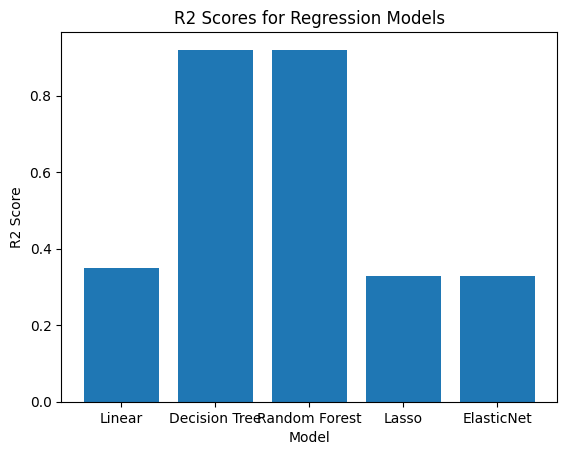

In [ ]:
# Define the R2 scores for each model
r2_scores = [lr_r2, dt_r2, rf_r2, lasso_r2, enet_r2]

# Define the labels for each model
labels = ['Linear', 'Decision Tree', 'Random Forest', 'Lasso', 'ElasticNet']

# Create a bar chart of the R2 scores
plt.bar(labels, r2_scores)

# Set the title and axis labels
plt.title('R2 Scores for Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')

# Show the plot
plt.show()


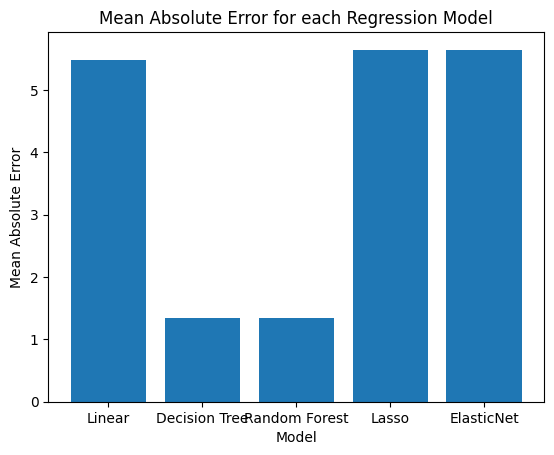

In [ ]:

# Create a list of mean absolute errors for each model
mae = [lr_mae, dt_mae, rf_mae, lasso_mae, enet_mae]

# Create a list of model names
models = ['Linear', 'Decision Tree', 'Random Forest', 'Lasso', 'ElasticNet']

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(models, mae)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Mean Absolute Error for each Regression Model')

# Display the chart
plt.show()


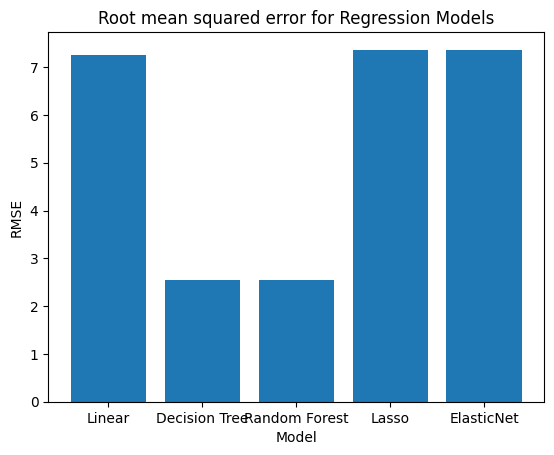

In [ ]:
# Define the rmse for each model
rmse = [lr_rmse, dt_rmse, rf_rmse, lasso_rmse, enet_rmse]

# Define the labels for each model
labels = ['Linear', 'Decision Tree', 'Random Forest', 'Lasso', 'ElasticNet']

# Create a bar chart of the rmse
plt.bar(labels, rmse)

# Set the title and axis labels
plt.title('Root mean squared error for Regression Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Show the plot
plt.show()


From above visualizations, we can conclude that Random Forest Regression model best suits for this data.

Prediction

In [ ]:
#predicts the cab price using a trained regression model, based on input parameters for source, destination, cab type and name.
def predict_cab_price(source, destination, cab_type, name):    
    loc_index = np.where(newdf.columns==name)[0]
    x = np.zeros(4)
    x[0] = source
    x[1] = destination
    x[2] = cab_type
    x[3] = name
    if loc_index >= 0:
        x[loc_index] = 1

    return rfregressor.predict([x])[0]

In [ ]:
price_predicted = rfregressor.predict(X_test)

In [ ]:
#Northeastern to haymarket by uber UberX
predict_cab_price(8,5,1,10)

<ipython-input-52-95b7980aaf1a>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


7.256924441505845

In [ ]:
#Northeastern to haymarket by lyft Lyft
predict_cab_price(8,5,0,5)

<ipython-input-52-95b7980aaf1a>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


7.056506593575284